In [85]:
#Использовал данный файл в качестве образца.

#Добавил похожий dataset с цене на золото с данными до 2024 года.


#task4.4: Сделать модель с меньшим количеством слоев LSTM




### Let's get started:

# Step 1: Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [3]:
import os

os.listdir('../input')


['goldprice', 'gold-price-10-years-20132023']

# Step 2: Reading Dataset

In [9]:
#df = pd.read_csv('/kaggle/input/Gold Price (2013-2023).csv')
df = pd.read_csv('/kaggle/input/goldprice/goldstock v2.csv')

# Step 3: Dataset Overview

In [10]:
df.head(2)

,Unnamed: 0,Date,Close/Last,Volume,Open,High,Low
0,0,2024-07-03,2369.4,185930.0,2338.6,2374.5,2335.7
1,1,2024-07-02,2333.4,146568.0,2341.6,2346.1,2327.4


__Dataset Basic Information:__

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close/Last  2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


# Step 4: Data Preparation

In [12]:
df.drop(['Unnamed: 0','Volume'], axis= 1, inplace=True)

## Step 4.2: Transforming Data

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df.head(2)

,Date,Close/Last,Open,High,Low
0,2014-07-07,1317.0,1321.4,1321.7,1312.1
1,2014-07-08,1316.5,1320.8,1325.7,1314.3


In [14]:
NumCols = df.columns.drop(['Date'])
#df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
#df[NumCols] = df[NumCols].astype('float64')

df.head(5)

,Date,Close/Last,Open,High,Low
0,2014-07-07,1317.0,1321.4,1321.7,1312.1
1,2014-07-08,1316.5,1320.8,1325.7,1314.3
2,2014-07-09,1324.3,1320.4,1333.4,1318.7
3,2014-07-10,1339.2,1325.0,1346.8,1325.0
4,2014-07-11,1337.4,1336.5,1340.4,1334.6


__Result:__

In [15]:
df.rename(columns={'Close/Last':'Price'},inplace=True)

## Step 4.3: Checking Duplicates
__There are no duplicate samples in Date feature:__

In [16]:
df.duplicated().sum()

0

## Step 4.4: Checking Missing Values
__There are no missing values in the dataset:__

In [17]:
df.isnull().sum().sum()

0

# Step 5: Visualizing Gold Price History Data

__Interactive Gold Price Chart:__

In [18]:
fig = px.line(y=df.Price, x=df.Date)
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

In [19]:
test_size = df[df.Date.dt.year==2024].shape[0]
test_size

127

__Gold Price Training and Test Sets Plot:__

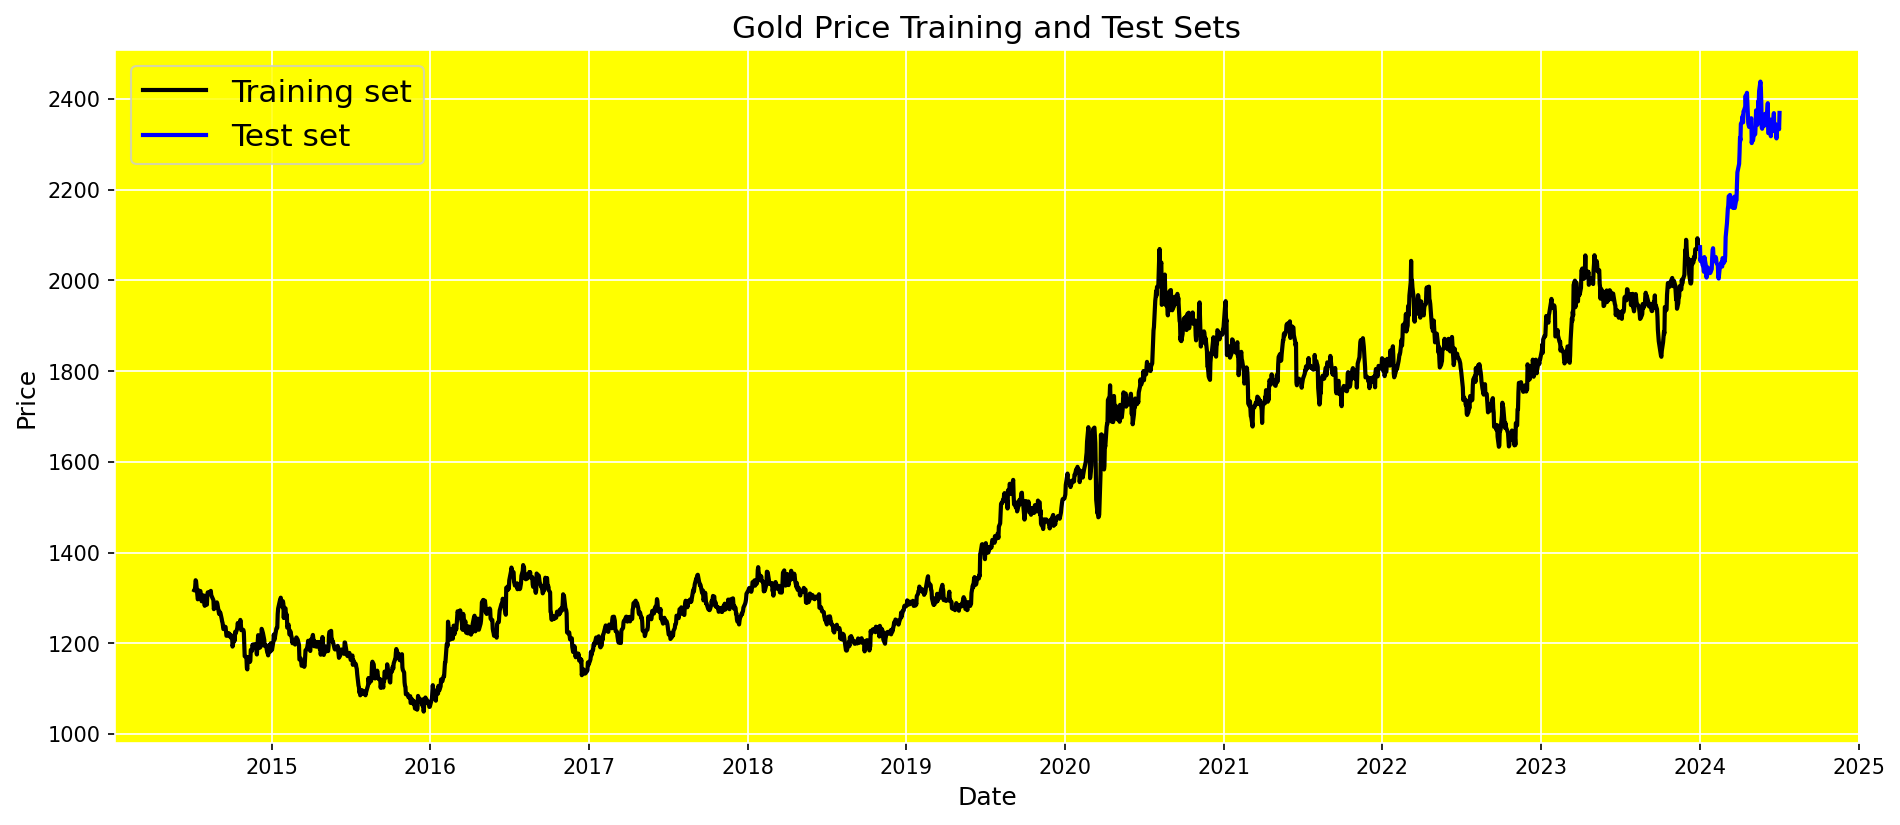

In [20]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df.Date[:-test_size], df.Price[:-test_size], color='black', lw=2)
plt.plot(df.Date[-test_size:], df.Price[-test_size:], color='blue', lw=2)
plt.title('Gold Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [21]:
scaler = MinMaxScaler()
scaler.fit(df.Price.values.reshape(-1,1))

MinMaxScaler()

In [22]:
window_size = 60

__Training Set:__

In [23]:
train_data = df.Price[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [24]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

__Test Set:__

In [25]:
test_data = df.Price[-test_size-window_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [26]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, 0])
    y_test.append(test_data[i, 0])

In [27]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [28]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [29]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (2324, 60, 1)
y_train Shape:  (2324, 1)
X_test Shape:   (127, 60, 1)
y_test Shape:   (127, 1)


__Model Definition:__

In [30]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(120, return_sequences=True)(input1)  
    x = Dropout(0.1)(x)
    #x = LSTM(units = 60, return_sequences=True)(x)
    #x = Dropout(0.2)(x)
    x = LSTM(units = 120)(x)
    x = Dropout(0.2)(x)
    x = Dense(60, activation='tanh')(x)
    dnn_output = Dense(1)(x)
    print(dnn_output)


    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Adam')
    model.summary()
    
    return model

__Model Training:__

In [31]:
model = define_model()
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=1)

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_6>


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 60, 120)        │        58,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 120)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 120)            │       115,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 60)             │         7,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,561 (709.22 KB)

 Trainable params: 181,561 (709.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - loss: 0.0170 - val_loss: 0.0013
Epoch 2/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0011 - val_loss: 7.5818e-04
Epoch 3/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 7.6983e-04 - val_loss: 7.9040e-04
Epoch 4/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 7.7633e-04 - val_loss: 0.0011
Epoch 5/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 6.8979e-04 - val_loss: 5.7003e-04
Epoch 6/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - loss: 5.8903e-04 - val_loss: 4.8657e-04
Epoch 7/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 5.6917e-04 - val_loss: 0.0011
Epoch 8/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 5.7942e-04 - val_loss: 4.9483e-04
Epoch 9/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 5.5004e-04 - val_loss: 4.2712e-04
Epoch 10/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 5.1226e-04 - val_loss: 4.2741e-04
Epoch 11/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 4.6406e-04 - va

# Step 11: Model Evaluation
__Next, we evaluate our time series forecast using MAPE (Mean Absolute Percentage Error) metric:__

In [32]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test) 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 6.2671e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


In [33]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

In [34]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.000620196748059243
Test MAPE: 0.025464066166311014
Test Accuracy: 0.974535933833689


# Step 12: Visualizing Results

__Returning the actual and predicted Price values to their primary scale:__

In [35]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

__Investigating the closeness of the prices predicted by the model to the actual prices:__

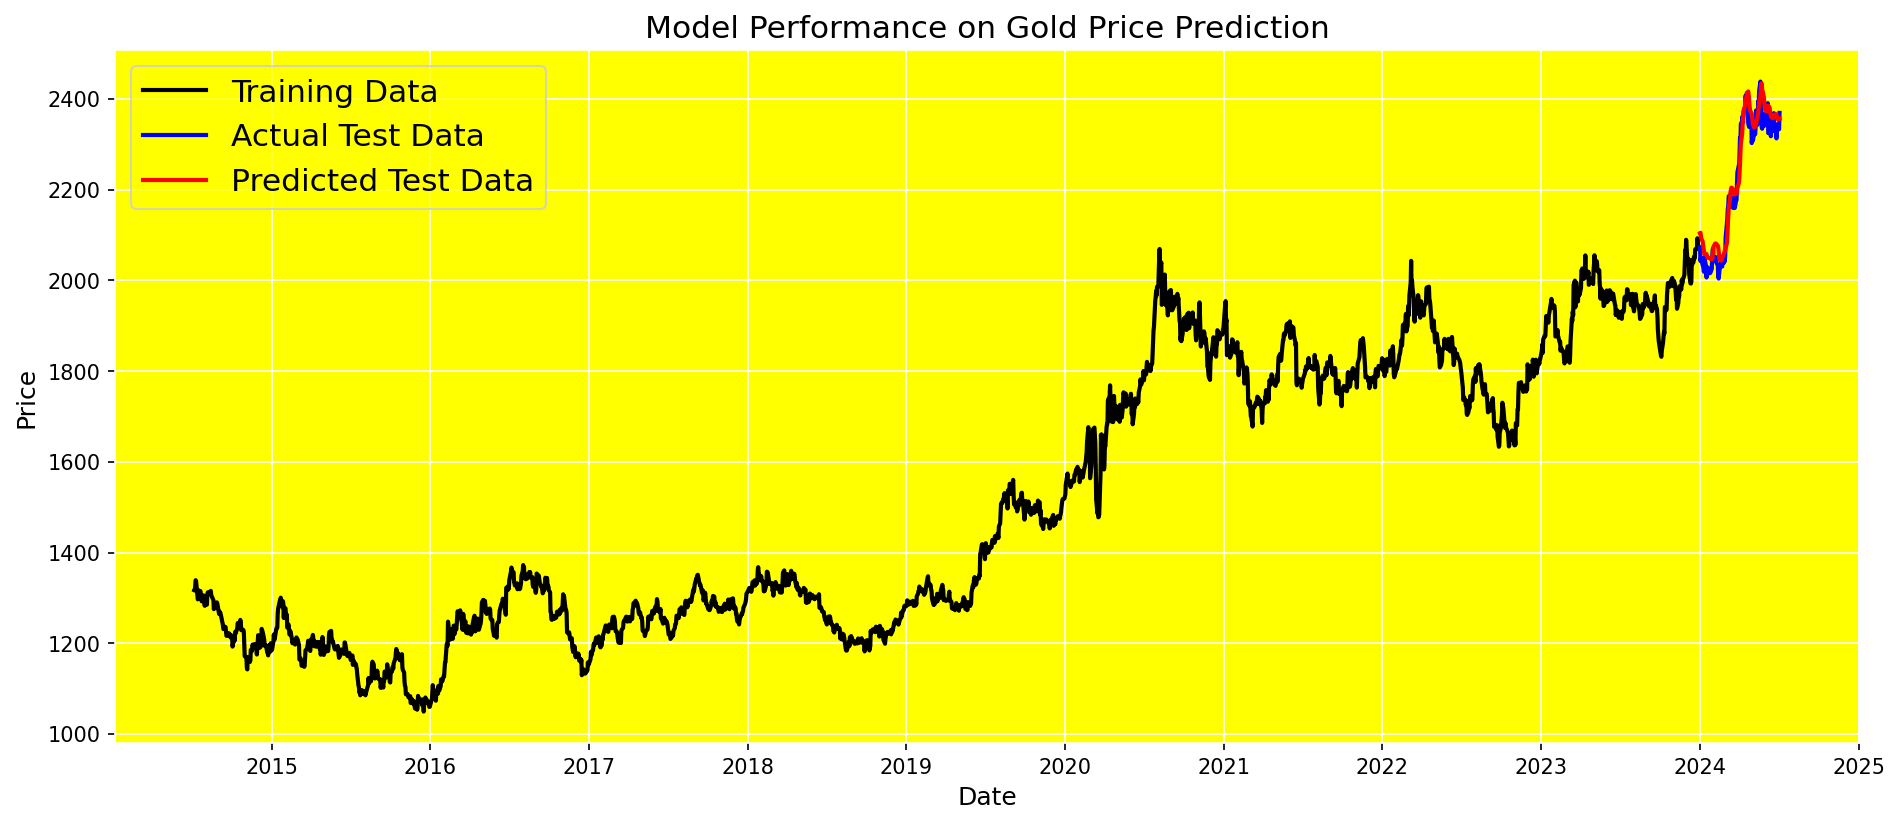

In [36]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [147]:
# task4.5: Сделать модель на базе RNN & BiRNN



In [39]:
from tensorflow.keras.layers import SimpleRNN, Bidirectional

In [66]:
def define_model_birnn():
    input1 = Input(shape=(window_size,1))
    x = Bidirectional(SimpleRNN(120,return_sequences=True))(input1)  
    x = Dropout(0.2)(x)
    #x = LSTM(units = 60, return_sequences=True)(x)
    #x = Dropout(0.2)(x)
    x = Bidirectional(SimpleRNN(60))(x)
    x = Dropout(0.2)(x)
    x = Dense(120, activation='tanh')(x)
    dnn_output = Dense(1)(x)



    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Adam')
    model.summary()
    
    return model


In [67]:
model = define_model_birnn()
history = model.fit(X_train, y_train, epochs=15, 
                    batch_size=32, validation_split=0.1, verbose=1)

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_12                │ (None, 60, 240)        │        29,280 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 60, 240)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ (None, 120)            │        36,120 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 120)            │        14,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,041 (312.66 KB)

 Trainable params: 80,041 (312.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.1277 - val_loss: 0.0020
Epoch 2/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0068 - val_loss: 0.0012
Epoch 3/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0045 - val_loss: 0.0018
Epoch 4/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0024 - val_loss: 3.7823e-04
Epoch 5/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0019 - val_loss: 9.7221e-04
Epoch 6/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 7/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0014 - val_loss: 3.8819e-04
Epoch 8/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0013 - val_loss: 3.1252e-04
Epoch 9/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0012 - val_loss: 9.1770e-04
Epoch 10/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 9.0016e-04 - val_loss: 4.5330e-04
Epoch 11/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0010 - val_loss: 3.2600e-04
Epoch 12/15
66/66 ━━━━━━━━━━━━━

In [68]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test) 

MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

y_test_true1 = scaler.inverse_transform(y_test)
y_test_pred1 = scaler.inverse_transform(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0040    
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step
Test Loss: 0.006767969578504562
Test MAPE: 0.0731515427710341
Test Accuracy: 0.9268484572289659


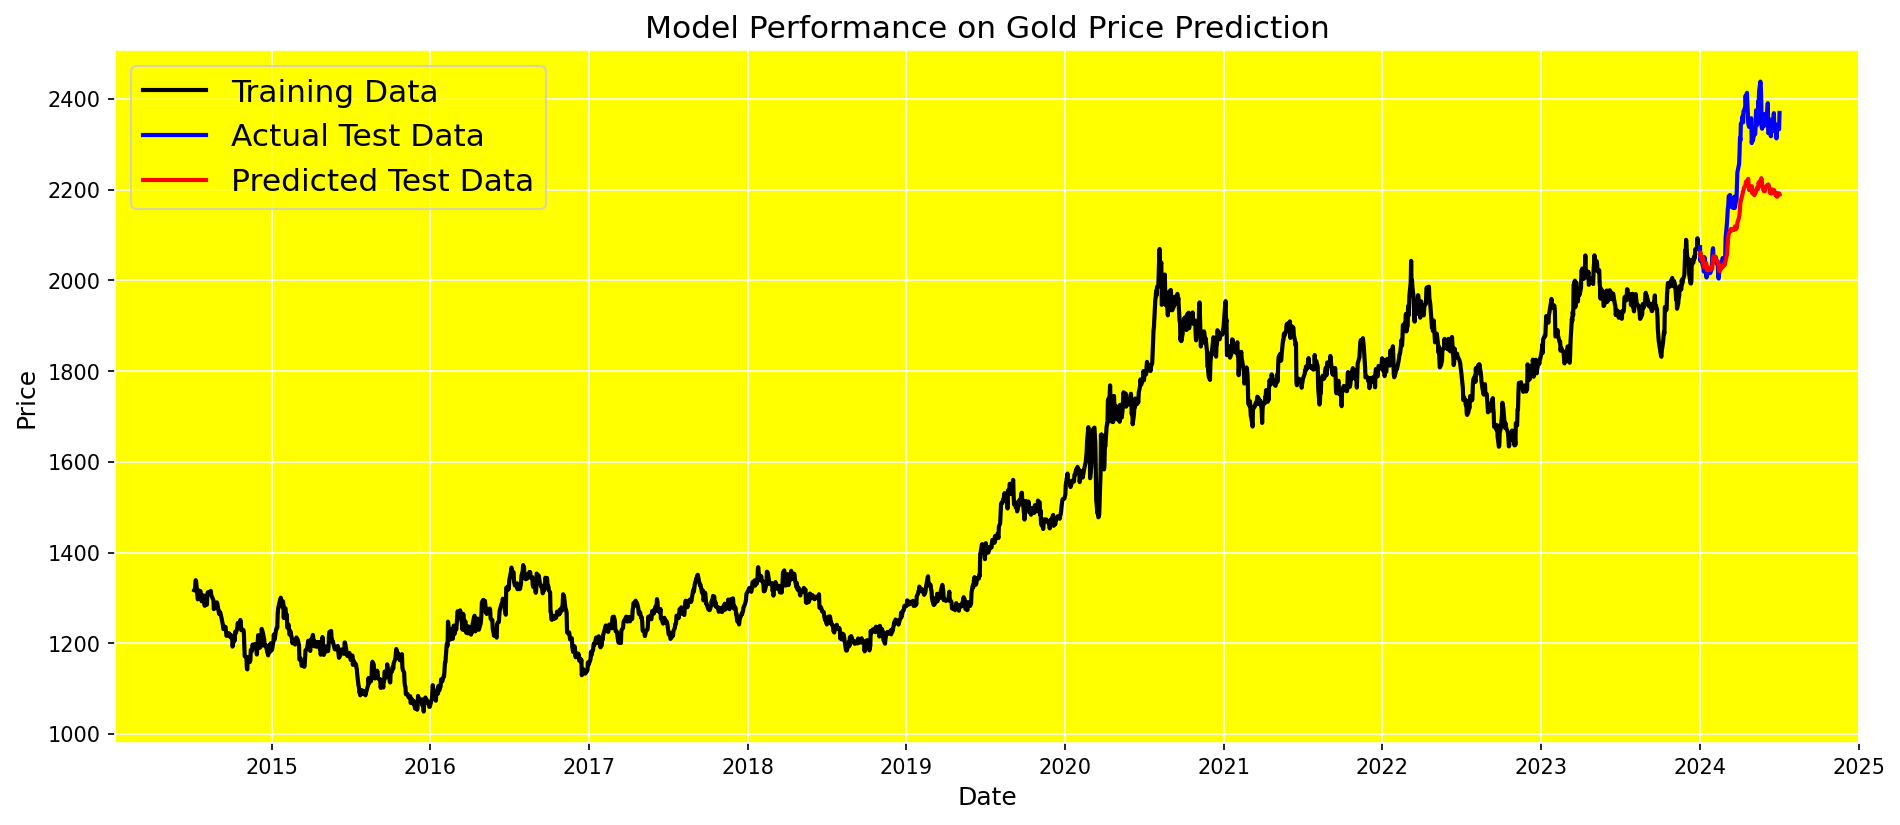

In [69]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true1, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred1, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [81]:
def define_model_rnn():
    input1 = Input(shape=(window_size,1))
    x = SimpleRNN(60,return_sequences=True)(input1)  
    x = Dropout(0.2)(x)
    #x = LSTM(units = 60, return_sequences=True)(x)
    #x = Dropout(0.2)(x)
    x = SimpleRNN(60)(x)
    x = Dropout(0.2)(x)
    x = Dense(120, activation='tanh')(x)
    dnn_output = Dense(1)(x)



    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Adam')
    model.summary()
    
    return model

In [82]:
model = define_model_rnn()
history = model.fit(X_train, y_train, epochs=15, 
                    batch_size=32, validation_split=0.1, verbose=1)

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_26 (SimpleRNN)       │ (None, 60, 60)         │         3,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_27 (SimpleRNN)       │ (None, 60)             │         7,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 120)            │         7,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,421 (71.96 KB)

 Trainable params: 18,421 (71.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0702 - val_loss: 8.9266e-04
Epoch 2/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0042 - val_loss: 7.4340e-04
Epoch 3/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 4/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 5/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0014 - val_loss: 6.9491e-04
Epoch 6/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 7/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0013 - val_loss: 0.0108
Epoch 8/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 9/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0011 - val_loss: 8.5511e-04
Epoch 10/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0011 - val_loss: 9.1527e-04
Epoch 11/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.3179e-04 - val_loss: 0.0017
Epoch 12/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 

In [83]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test) 

MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

y_test_true1 = scaler.inverse_transform(y_test)
y_test_pred1 = scaler.inverse_transform(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0096    
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
Test Loss: 0.015596071258187294
Test MAPE: 0.12093870511828982
Test Accuracy: 0.8790612948817101


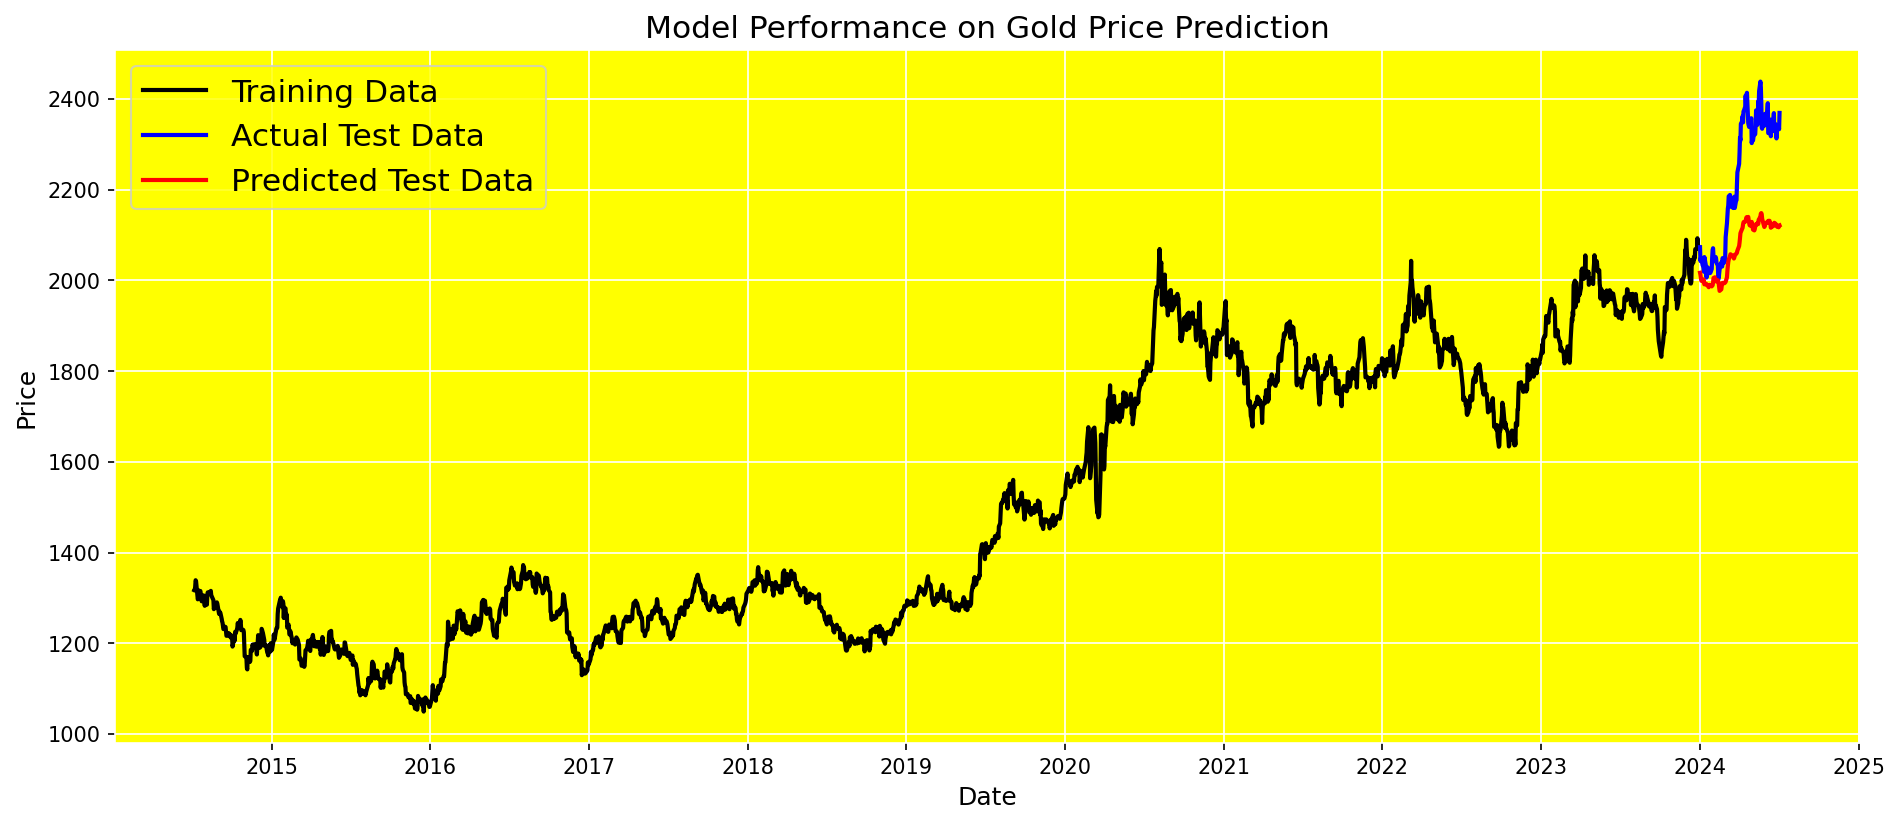

In [84]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true1, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred1, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()